# **Linear Regression using Google Play Store**
**Predict Ratings of new apps uploaded on Google Play Store**

**STEP-1: Import The Library**

In [1]:
# import the library
import pandas as pd # Data Cleaning
import numpy as np  # Data Manupulations
import matplotlib.pyplot as plt # Basic Visualization
import seaborn as sns   # Advanced Analytic visualization

**STEP-2: Import The Data**

In [2]:
df=pd.read_csv('/kaggle/input/googleplaystore/googleplaystore.csv')

**STEP-3: Know the DATA**

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
# Print Rows and Column
df.shape

(10841, 13)

In [5]:
# Information of Data
df.info()  # count of Null values and Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# STEP-4: Data Cleaning using Pandas Lib
1. Remove NULL Values
1. Change Data Types
1. Update/Remove Wrong Entries/Data
1. Remove Duplicates

In [6]:
#check for null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Drop Null Values
df.dropna(inplace=True)

In [8]:
# check again the null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
df['Reviews']=df['Reviews'].astype('int') # change data type into integer

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
df['Installs']=df['Installs'].str.replace('+','')
df['Installs']=df['Installs'].str.replace(',','')

In [13]:
df['Installs']=df['Installs'].astype('int')

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
df['Price']=df['Price'].str.replace('$','')

In [16]:
df['Price']=df['Price'].astype('float')

In [17]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [18]:
df['Size']=df['Size'].astype('float')

ValueError: could not convert string to float: '19M'

In [19]:
df['Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object>

In [20]:
#Create user Defined Function to convert M and k into single unit
def change_size(size):
    if 'M' in size:
        x=size[: -1] #19M
        x=float(x)*1000
        return x
    if 'k' in size:
        x=size[:-1] #19k
        x=float(x)
        return x
    else:
        return None

In [21]:
df['Size']=df['Size'].apply(change_size)

In [22]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [24]:
df['Size'].fillna(method='ffill',inplace=True)

In [25]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Sanity Check

In [26]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [27]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [28]:
df[df['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,23-Jul-18,1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


In [30]:
len(df[df['Reviews']>df['Installs']])

7

In [31]:
df[df['Reviews']>df['Installs']].index

Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [32]:
df.drop(df[df['Reviews']>df['Installs']].index, inplace=True)

In [33]:
df[(df['Type']=='Free')& (df['Price']>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Step-5: Identify the Relationships

<Axes: xlabel='Price'>

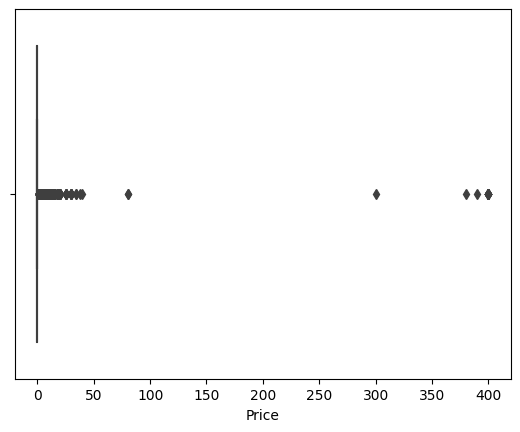

In [34]:
sns.boxplot(x='Price',data=df)

<Axes: xlabel='Reviews'>

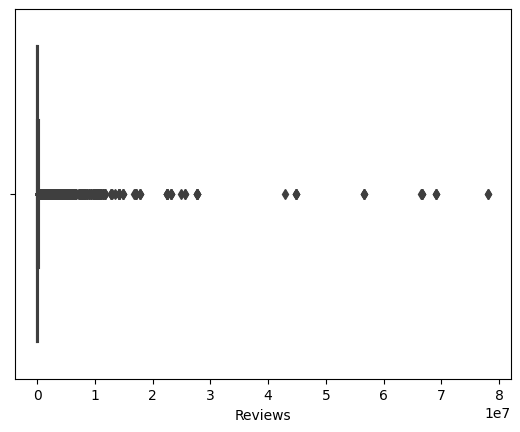

In [35]:
sns.boxplot(x='Reviews',data=df)

<Axes: xlabel='Installs', ylabel='Count'>

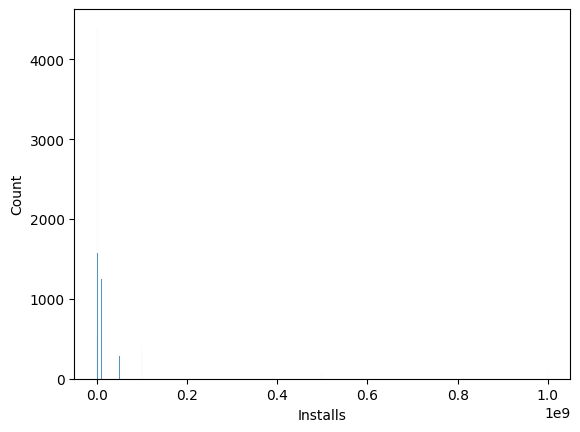

In [36]:
sns.histplot(x='Installs',data=df)

<Axes: xlabel='Installs'>

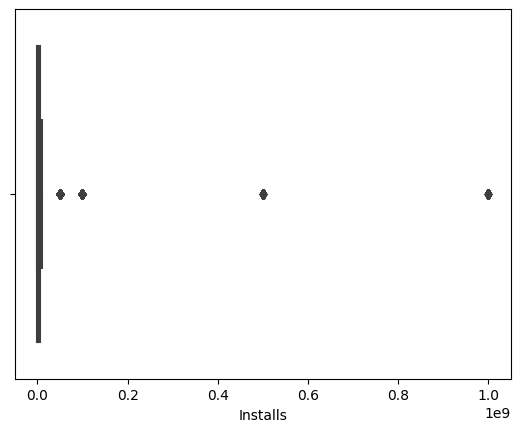

In [37]:
sns.boxplot(x='Installs',data=df)

<Axes: xlabel='Rating', ylabel='Count'>

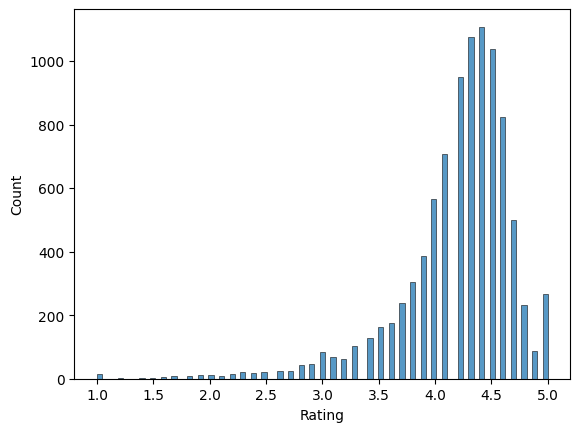

In [38]:
sns.histplot(x='Rating',data=df)

<Axes: xlabel='Size', ylabel='Count'>

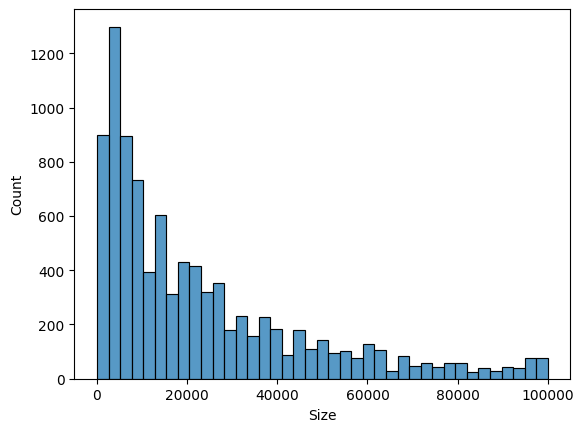

In [39]:
sns.histplot(x='Size',data=df)

# Outlier Treatment

In [40]:
df[df['Price']>50].shape

(17, 13)

In [41]:
df[df['Price']>50].index

Index([2253, 2365, 4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359,
       5362, 5364, 5366, 5369, 5373],
      dtype='int64')

In [42]:
df.drop(df[df['Price']>50].index, inplace=True)

<Axes: xlabel='Price'>

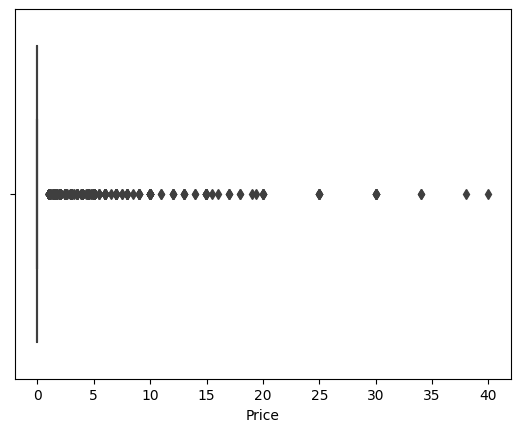

In [43]:
sns.boxplot(x='Price',data=df)

In [44]:
df[df['Reviews']>=2000000].shape

(453, 13)

In [45]:
df.drop(df[df['Reviews']>=2000000].index,inplace=True)

<Axes: xlabel='Reviews'>

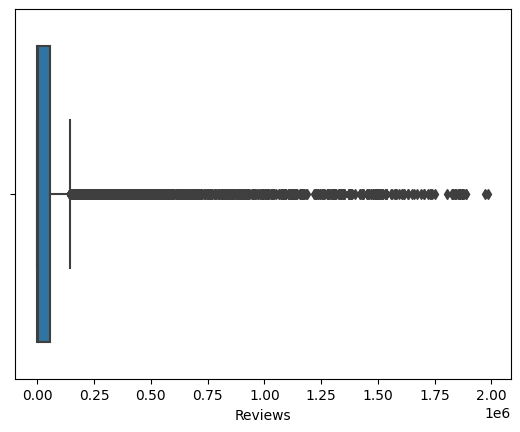

In [46]:
sns.boxplot(x='Reviews',data=df)

In [47]:
df.drop(df[df['Installs']>=100000000].index,inplace=True)

<Axes: xlabel='Installs'>

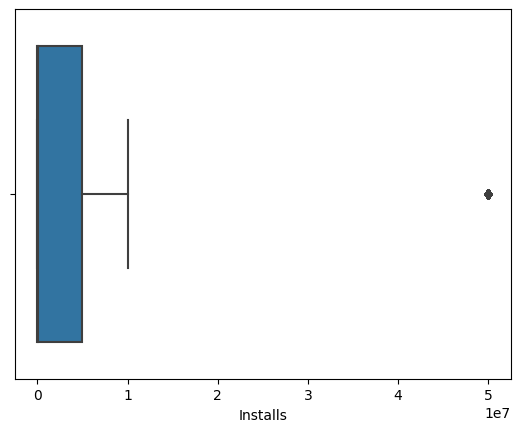

In [48]:
sns.boxplot(x='Installs',data=df)

In [49]:
df.shape

(8741, 13)

# Bivariate Analysis

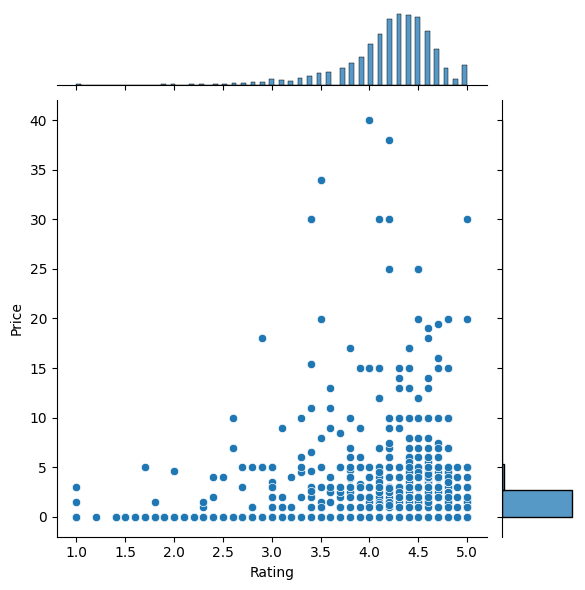

In [50]:
sns.jointplot(x='Rating',y='Price',data=df)
plt.show()

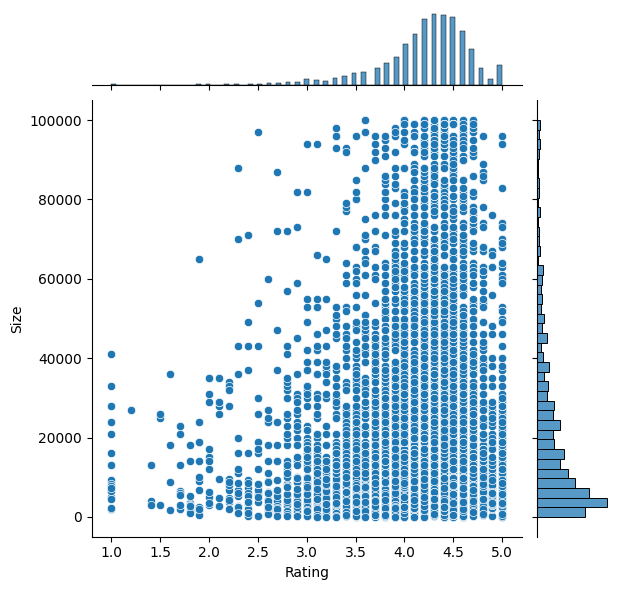

In [51]:
sns.jointplot(x='Rating',y='Size',data=df)
plt.show()

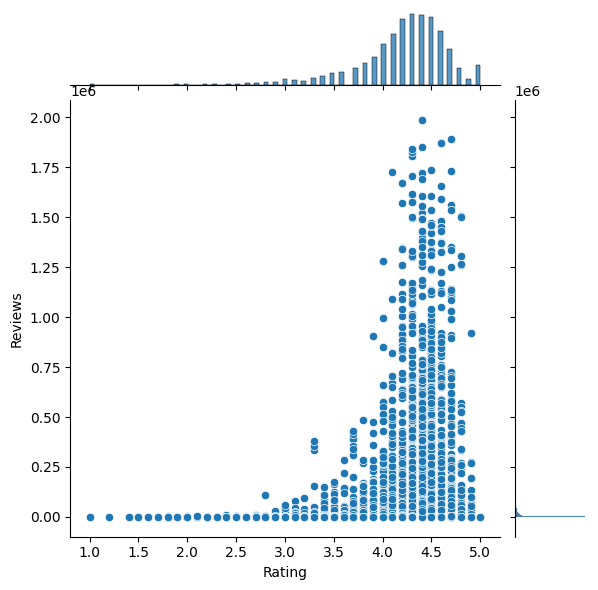

In [52]:
sns.jointplot(x='Rating',y='Reviews',data=df)
plt.show()

In [53]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

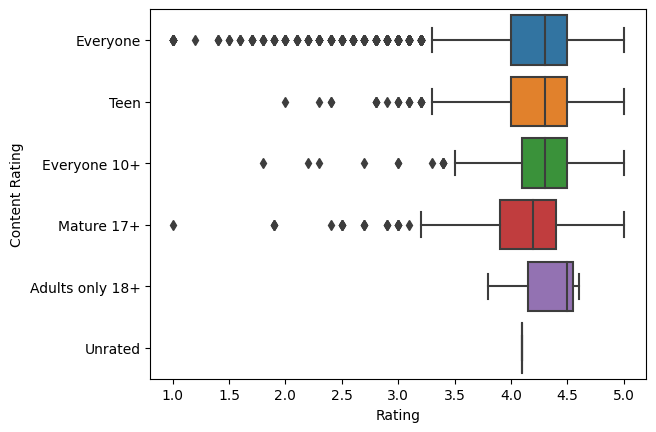

In [54]:
sns.boxplot(x='Rating',y='Content Rating',data=df)
plt.show()

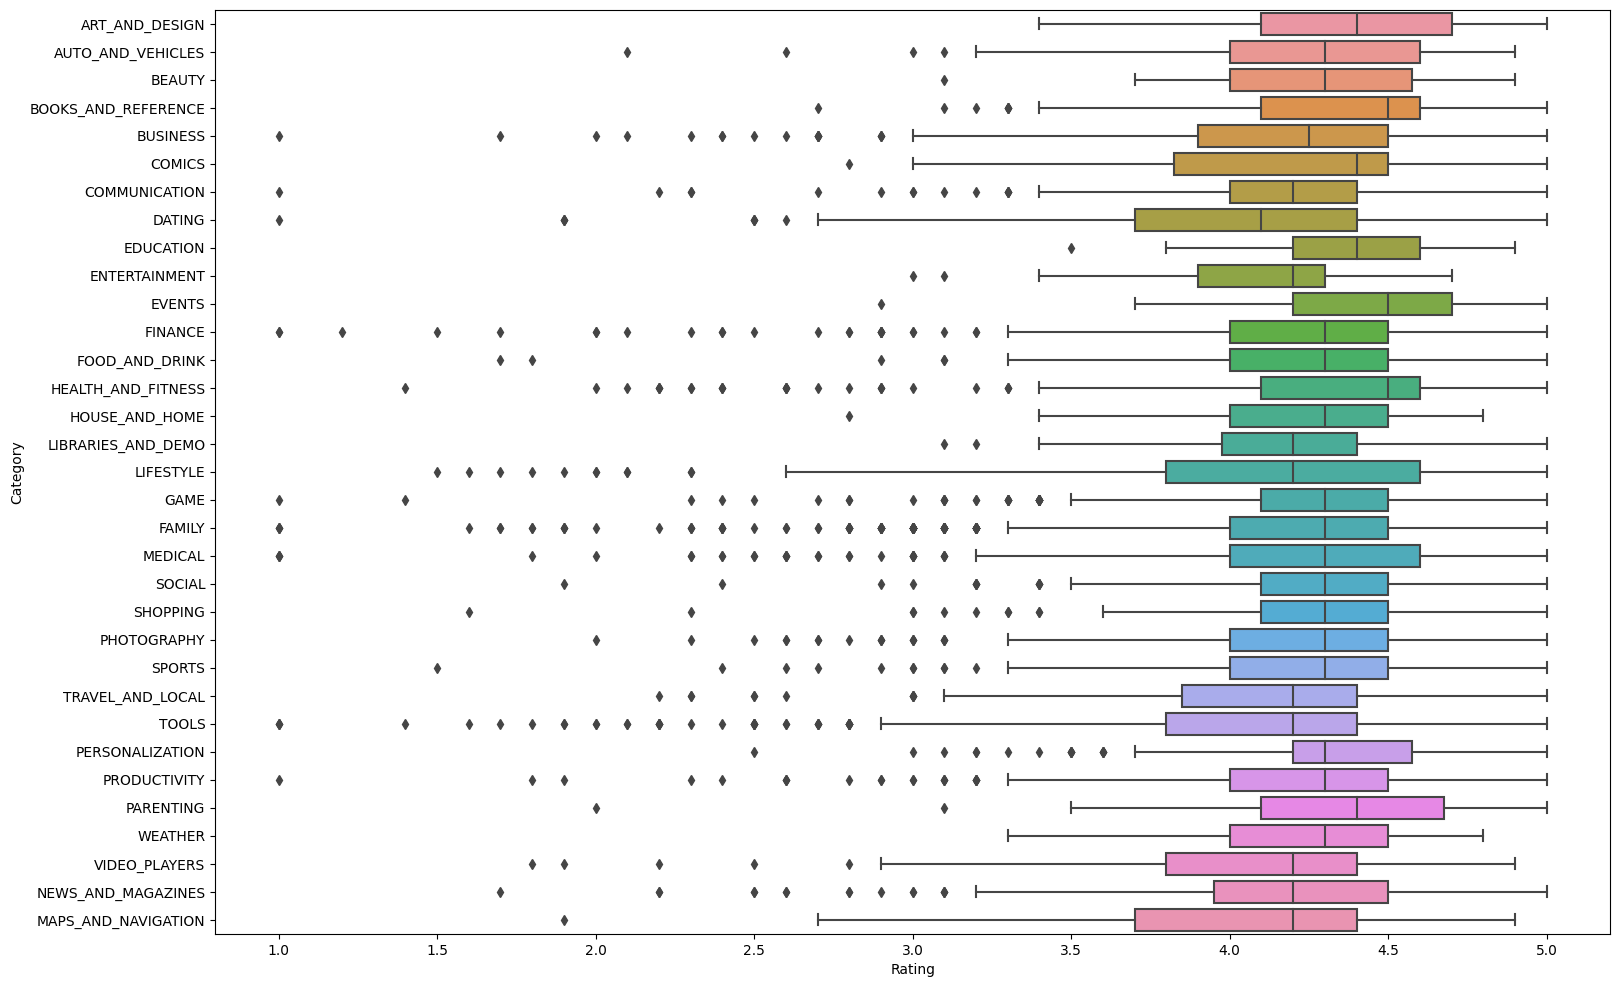

In [57]:
plt.figure(figsize=(18,12))
sns.boxplot(x='Rating',y='Category',data=df)
plt.show()

In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [59]:
inp1=df.copy()

In [60]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [61]:
inp1.drop(['App','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [62]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

# Standarize the data in Installs and Reviews

In [63]:
inp1['Installs']=inp1['Installs'].apply(np.log1p)

In [64]:
inp1['Reviews']=inp1['Reviews'].apply(np.log1p)

In [65]:
inp1.shape

(8741, 9)

# Convert categorical data into numeric data

In [66]:
inp2=pd.get_dummies(inp1)

In [67]:
inp2.shape

(8741, 161)

# Steps to implement Algo Linear Regression

In [68]:
#Extract Features(Input/x) and Target(Output/y)
y=inp2.pop('Rating')
x=inp2

# Separate the data into Training and Testing datasets

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [73]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression() # converting Class type data to object type data
linear_reg.fit(X_train,y_train) #learning from training data
y_pred=linear_reg.predict(X_test)

# Check the error in model

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE=",mean_squared_error(y_test,y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score=", r2_score(y_test,y_pred))

MSE= 0.22528386993782326
RMSE= 0.4746407798934087
R2_score= 0.14177922982763036
